<a href="https://colab.research.google.com/github/WizardOfCodes442/BigData/blob/master/intro-to-timeseriesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

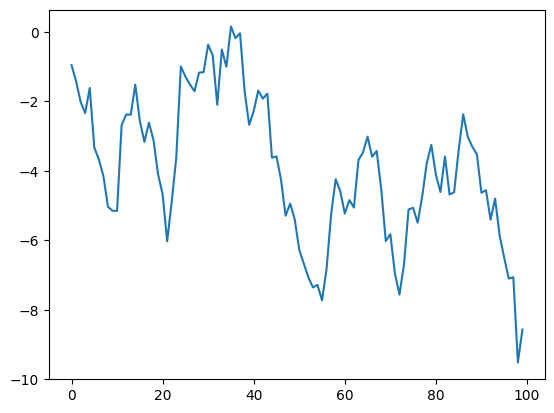

NameError: name 'ts' is not defined

In [ ]:
import matplotlib.pyplot as plt
import random

def generate_random_walk(length = 100, mu = 0, sig=1):
  ts = []
  for i in range(length):
    e = random.gauss(mu, sig)
    if  i == 0:
      ts.append(e)
    else:
      ts.append(ts[i-1] +e)
  return ts



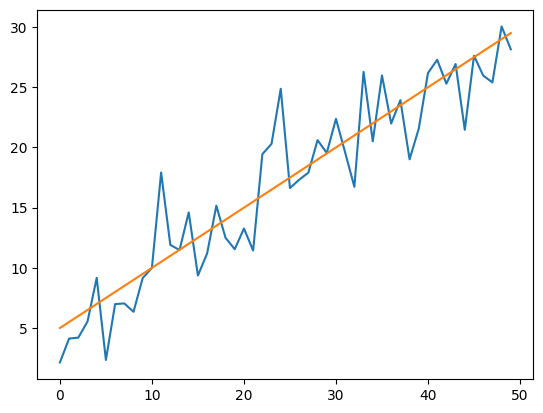

In [ ]:
random.seed(10)
length = 50
A = 5
B = .5
C = 3
trend = [A+B * i for i in range(length)]
noise = [C * random.gauss(0, 1) for _ in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

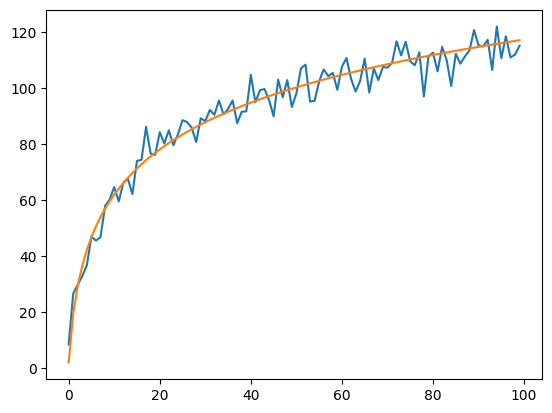

In [ ]:
from math import log
import matplotlib.pyplot
import random

random.seed(1)
length = 100
A = 2
B = 25
C = 5
noise = [ C * random.gauss(0, 1) for _ in range(length)]
trend = [A+ B * log(i) for i in range(1, length + 1)]

ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

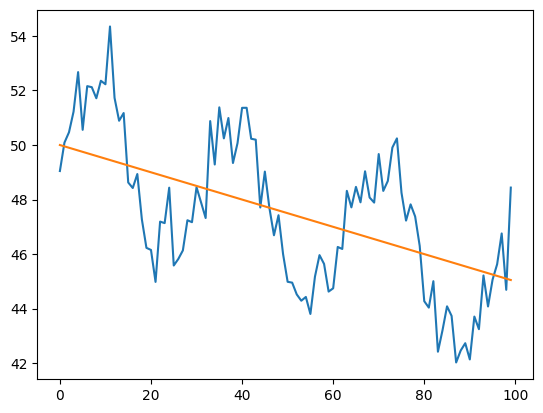

In [ ]:
from math import sin
import matplotlib.pyplot
import random

random.seed(10)
length = 100
A = 50
B = -.05
C = 1
S = 3
trend = [A + B * i for i in range(length)]
seasons = [S * sin(i/ 5) for i in range(length)]
noise = [C * random.gauss(0, 1) for _ in range(length)]
ts = [trend[i] + seasons[i] + noise[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

In [2]:
#classical ar
from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf
quotes = yf.download('FB', start='2011-1-1', end='2021-1-1')
model = AutoReg(quotes['Close'], lags=2
                )
model_fit = model.fit()
print(model_fit.params)


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('possibly delisted; no timezone found')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: maxlag should be < nobs

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'
quotes = yf.download('FB', start=from_date, end=to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]
model = ARIMA(train, order =(5, 2, 3))
results = model.fit()
forecast = results.forecast()
predicted = forecast[0]
print(f'Predicted price on {to_date}: \
    {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('possibly delisted; no timezone found')


IndexError: index -1 is out of bounds for axis 0 with size 0